In [11]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_excel('baseline_database_codes_RA_group3.xlsx')  # Load Excel file

# Select columns from 'carni_rosse' to 'margarina' and 'DAS28'
columns_to_select = df.loc[:, 'carni_rosse':'margarina'].columns.tolist()
columns_to_select.append('DAS28')
# exclude 'acqua' and salt/sugar/oil columns
columns_to_exclude = ['acqua', 'sale_cottura', 'sale_dopo_cottura', 'zucchero_aggiunto', 'dolcificante', 'olio_oliva', 'olio_semi']

for col in columns_to_exclude:
    if col in columns_to_select:
        columns_to_select.remove(col)

# Create new database with selected columns
new_database = df[columns_to_select].copy()

In [13]:
new_database.head()

,carni_rosse,maiale,fast.food,carni_bianca,carni_processata,merluzzo_sogliola,sgombro_lanzardo,pesce_spada,masculino_alici,tonno,...,latte,latte_soia_risa,yogurt,formaggio_giallo,ricotta_formaggi_magri,mozzarella,formaggio.spalmabile,burro,margarina,DAS28
0,2-3/settimana,2/mese,mai,2/mese,2-3/settimana,2/mese,mai,mai,mai,1/mese,...,1/die,mai,mai,1/settimana,1/settimana,1/settimana,1/settimana,1/mese,mai,3.660762
1,2-3/settimana,2/mese,mai,2-3/settimana,1/settimana,2/mese,mai,mai,1/mese,1/settimana,...,2-3/settimana,1/mese,2-3/settimana,1/settimana,1/settimana,1/settimana,1/settimana,1/settimana,mai,1.796643
2,2-3/settimana,2-3/settimana,mai,2-3/settimana,1/mese,2/mese,mai,2/mese,2-3/settimana,4-5/settimana,...,1/mese,mai,2-3/settimana,mai,mai,1/settimana,mai,2/mese,2/mese,2.465101
3,2-3/settimana,mai,mai,2-3/settimana,2-3/settimana,1/settimana,mai,1/mese,mai,2/mese,...,mai,1/die,1/die,mai,2-3/settimana,1/settimana,2/mese,2/mese,mai,3.133907
4,1/settimana,mai,mai,2/mese,1/mese,mai,2/mese,1/mese,1/mese,2/mese,...,1/die,mai,2-3/settimana,2/mese,2-3/settimana,2-3/settimana,1/mese,1/mese,mai,2.794231


In [14]:
new_database.shape

(365, 103)

In [15]:
# Check for missing values in the new_database
missing_values = new_database.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]

print("Missing values per column:")
print(missing_columns)

print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing values: {(missing_values.sum() / (new_database.shape[0] * new_database.shape[1])) * 100:.2f}%")

Missing values per column:
Series([], dtype: int64)

Total missing values: 0
Percentage of missing values: 0.00%


In [16]:
# Replace "mai" with 0 in the new_database
new_database = new_database.replace("mai", 0)

In [17]:
new_database.head()

,carni_rosse,maiale,fast.food,carni_bianca,carni_processata,merluzzo_sogliola,sgombro_lanzardo,pesce_spada,masculino_alici,tonno,...,latte,latte_soia_risa,yogurt,formaggio_giallo,ricotta_formaggi_magri,mozzarella,formaggio.spalmabile,burro,margarina,DAS28
0,2-3/settimana,2/mese,0,2/mese,2-3/settimana,2/mese,0,0,0,1/mese,...,1/die,0,0,1/settimana,1/settimana,1/settimana,1/settimana,1/mese,0,3.660762
1,2-3/settimana,2/mese,0,2-3/settimana,1/settimana,2/mese,0,0,1/mese,1/settimana,...,2-3/settimana,1/mese,2-3/settimana,1/settimana,1/settimana,1/settimana,1/settimana,1/settimana,0,1.796643
2,2-3/settimana,2-3/settimana,0,2-3/settimana,1/mese,2/mese,0,2/mese,2-3/settimana,4-5/settimana,...,1/mese,0,2-3/settimana,0,0,1/settimana,0,2/mese,2/mese,2.465101
3,2-3/settimana,0,0,2-3/settimana,2-3/settimana,1/settimana,0,1/mese,0,2/mese,...,0,1/die,1/die,0,2-3/settimana,1/settimana,2/mese,2/mese,0,3.133907
4,1/settimana,0,0,2/mese,1/mese,0,2/mese,1/mese,1/mese,2/mese,...,1/die,0,2-3/settimana,2/mese,2-3/settimana,2-3/settimana,1/mese,1/mese,0,2.794231


In [18]:
# Replace frequency values with numeric equivalents
replacement_dict = {
    "1/die": 1,
    "2-3/die": 2.5,
    "4-5/die": 4.5,
    "1/mese": 0.033,
    "2/mese": 0.067,
    "1/settimana": 0.143,
    "2-3/settimana": 0.357,
    "4-5/settimana": 0.643
}

new_database = new_database.replace(replacement_dict).infer_objects(copy=False)

In [19]:
new_database.head()

,carni_rosse,maiale,fast.food,carni_bianca,carni_processata,merluzzo_sogliola,sgombro_lanzardo,pesce_spada,masculino_alici,tonno,...,latte,latte_soia_risa,yogurt,formaggio_giallo,ricotta_formaggi_magri,mozzarella,formaggio.spalmabile,burro,margarina,DAS28
0,0.357,0.067,0.0,0.067,0.357,0.067,0.000,0.000,0.000,0.033,...,1.000,0.000,0.000,0.143,0.143,0.143,0.143,0.033,0.000,3.660762
1,0.357,0.067,0.0,0.357,0.143,0.067,0.000,0.000,0.033,0.143,...,0.357,0.033,0.357,0.143,0.143,0.143,0.143,0.143,0.000,1.796643
2,0.357,0.357,0.0,0.357,0.033,0.067,0.000,0.067,0.357,0.643,...,0.033,0.000,0.357,0.000,0.000,0.143,0.000,0.067,0.067,2.465101
3,0.357,0.000,0.0,0.357,0.357,0.143,0.000,0.033,0.000,0.067,...,0.000,1.000,1.000,0.000,0.357,0.143,0.067,0.067,0.000,3.133907
4,0.143,0.000,0.0,0.067,0.033,0.000,0.067,0.033,0.033,0.067,...,1.000,0.000,0.357,0.067,0.357,0.357,0.033,0.033,0.000,2.794231


In [20]:
# Get a list of all columns in the new_database
columns_list = new_database.columns.tolist()
print("List of columns in new_database:")
print(columns_list)
print(f"\nTotal number of columns: {len(columns_list)}")

List of columns in new_database:
['carni_rosse', 'maiale', 'fast.food', 'carni_bianca', 'carni_processata', 'merluzzo_sogliola', 'sgombro_lanzardo', 'pesce_spada', 'masculino_alici', 'tonno', 'salmone', 'frutti_mare', 'uovo', 'dolci_vari', 'gelati_granite', 'cioccolato_latte', 'cioccolato_fondente', 'patatine_snack', 'castagne', 'arachidi', 'pistacchi', 'noci', 'mandorle', 'nocciole', 'marmellata_miele', 'creme_spalmabili', 'carota', 'spinaci', 'broccoli', 'cavoli', 'cavolfiori', 'piselli', 'fagiolini', 'zucchine', 'cicoria', 'asparagi', 'cipolla', 'aglio', 'funghi', 'insalata', 'pomodori', 'finocchi', 'mais', 'fagioli', 'ceci', 'lenticchie', 'fave', 'carciofi', 'soia_tofu', 'peperoni', 'melanzane', 'olive_verdi', 'olive_nere', 'mele', 'pere', 'arance_mandarini', 'arance_rosse', 'banana', 'uva', 'melone', 'anguria', 'pesche', 'albicocche', 'fragole', 'kiwi', 'ciliegie', 'frutti_rossi', 'melegrano', 'fichi_india', 'prugne', 'fichi', 'te_nero_tisane', 'te_verde', 'te_tisane_frutta', 'caf

In [21]:
# Define food categories based on actual column names
food_categories = {
    'pasta_rice_potato': [
        'riso', 'pasta', 'riso_pasta_integrali', 'patatine_fritte', 'patate', 'pizza', 'tavola_calda'
    ],
    'bread': [
        'pane_farinacei', 'pane_farinacei_integrali', 'cornflakes_cereali'
    ],
    'meat': [
        'carni_rosse', 'maiale', 'fast.food', 'carni_bianca', 'carni_processata'
    ],
    'fish': [
        'merluzzo_sogliola', 'sgombro_lanzardo', 'pesce_spada', 'masculino_alici', 'tonno', 'salmone', 'frutti_mare'
    ],
    'eggs': [
        'uovo'
    ],
    'cheese': [
        'formaggio_giallo', 'ricotta_formaggi_magri', 'mozzarella', 'formaggio.spalmabile'
    ],
    'vegetables': [
        'carota', 'spinaci', 'broccoli', 'cavoli', 'cavolfiori', 'zucchine', 'cicoria',
        'asparagi', 'cipolla', 'aglio', 'funghi', 'insalata', 'pomodori', 'finocchi',
        'mais', 'carciofi', 'peperoni', 'melanzane', 'soia_tofu', 'olive_verdi', 'olive_nere'
    ],
    'legumes': [
        'piselli', 'fagiolini', 'fagioli', 'ceci', 'lenticchie', 'fave'
    ],
    'fruit': [
        'mele', 'pere', 'arance_mandarini', 'arance_rosse', 'banana', 'uva', 'melone', 'anguria',
        'pesche', 'albicocche', 'fragole', 'kiwi', 'ciliegie', 'frutti_rossi',
        'melegrano', 'fichi_india', 'prugne', 'fichi'
    ],
    'sweets_snacks': [
        'dolci_vari', 'gelati_granite', 'cioccolato_latte', 'cioccolato_fondente', 'patatine_snack',
        'marmellata_miele', 'creme_spalmabili'
    ],
    'nuts': [
        'castagne', 'arachidi', 'pistacchi', 'noci', 'mandorle', 'nocciole'
    ],
    'milk_dairy': [
        'latte', 'latte_soia_risa', 'yogurt', 'burro', 'margarina'
    ],
    'soft_drinks': [
        'bevande_gassate', 'spremute_frullati_freschi', 'spremute_frullati_confezionati'
    ],
    'alcoholic_beverages': [
        'vino_rosso', 'vino_bianco', 'birra', 'liquori'
    ],
    'tea': [
        'te_nero_tisane', 'te_verde', 'te_tisane_frutta'
    ],
    'coffee': [
        'caffè', 'decaffeinato'
    ],
}

# Print available columns to help with mapping
columns_list = new_database.columns.tolist()
print("List of columns in new_database:")
print(columns_list)
print(f"\nTotal number of columns: {len(columns_list)}")

List of columns in new_database:
['carni_rosse', 'maiale', 'fast.food', 'carni_bianca', 'carni_processata', 'merluzzo_sogliola', 'sgombro_lanzardo', 'pesce_spada', 'masculino_alici', 'tonno', 'salmone', 'frutti_mare', 'uovo', 'dolci_vari', 'gelati_granite', 'cioccolato_latte', 'cioccolato_fondente', 'patatine_snack', 'castagne', 'arachidi', 'pistacchi', 'noci', 'mandorle', 'nocciole', 'marmellata_miele', 'creme_spalmabili', 'carota', 'spinaci', 'broccoli', 'cavoli', 'cavolfiori', 'piselli', 'fagiolini', 'zucchine', 'cicoria', 'asparagi', 'cipolla', 'aglio', 'funghi', 'insalata', 'pomodori', 'finocchi', 'mais', 'fagioli', 'ceci', 'lenticchie', 'fave', 'carciofi', 'soia_tofu', 'peperoni', 'melanzane', 'olive_verdi', 'olive_nere', 'mele', 'pere', 'arance_mandarini', 'arance_rosse', 'banana', 'uva', 'melone', 'anguria', 'pesche', 'albicocche', 'fragole', 'kiwi', 'ciliegie', 'frutti_rossi', 'melegrano', 'fichi_india', 'prugne', 'fichi', 'te_nero_tisane', 'te_verde', 'te_tisane_frutta', 'caf

In [23]:
# Create aggregated categories by manually adding specific columns
aggregated_data = pd.DataFrame()

# Convert all data to numeric first
new_database_numeric = new_database.apply(pd.to_numeric, errors='coerce').fillna(0)

# Define the aggregations manually for all categories
aggregated_data['pasta_rice_potato'] = (
    new_database_numeric.get('riso', 0) +
    new_database_numeric.get('pasta', 0) +
    new_database_numeric.get('riso_pasta_integrali', 0) +
    new_database_numeric.get('patatine_fritte', 0) +
    new_database_numeric.get('patate', 0) +
    new_database_numeric.get('pizza', 0) +
    new_database_numeric.get('tavola_calda', 0)
)

aggregated_data['bread'] = (
    new_database_numeric.get('pane_farinacei', 0) +
    new_database_numeric.get('pane_farinacei_integrali', 0) +
    new_database_numeric.get('cornflakes_cereali', 0)
)

aggregated_data['meat'] = (
    new_database_numeric.get('carni_rosse', 0) +
    new_database_numeric.get('maiale', 0) +
    new_database_numeric.get('fast.food', 0) +
    new_database_numeric.get('carni_bianca', 0) +
    new_database_numeric.get('carni_processata', 0)
)

aggregated_data['fish'] = (
    new_database_numeric.get('merluzzo_sogliola', 0) +
    new_database_numeric.get('sgombro_lanzardo', 0) +
    new_database_numeric.get('pesce_spada', 0) +
    new_database_numeric.get('masculino_alici', 0) +
    new_database_numeric.get('tonno', 0) +
    new_database_numeric.get('salmone', 0) +
    new_database_numeric.get('frutti_mare', 0)
)

aggregated_data['eggs'] = new_database_numeric.get('uovo', 0)

aggregated_data['cheese'] = (
    new_database_numeric.get('formaggio_giallo', 0) +
    new_database_numeric.get('ricotta_formaggi_magri', 0) +
    new_database_numeric.get('mozzarella', 0) +
    new_database_numeric.get('formaggio.spalmabile', 0)
)

aggregated_data['vegetables'] = (
    new_database_numeric.get('carota', 0) +
    new_database_numeric.get('spinaci', 0) +
    new_database_numeric.get('broccoli', 0) +
    new_database_numeric.get('cavoli', 0) +
    new_database_numeric.get('cavolfiori', 0) +
    new_database_numeric.get('zucchine', 0) +
    new_database_numeric.get('cicoria', 0) +
    new_database_numeric.get('asparagi', 0) +
    new_database_numeric.get('cipolla', 0) +
    new_database_numeric.get('aglio', 0) +
    new_database_numeric.get('funghi', 0) +
    new_database_numeric.get('insalata', 0) +
    new_database_numeric.get('pomodori', 0) +
    new_database_numeric.get('finocchi', 0) +
    new_database_numeric.get('mais', 0) +
    new_database_numeric.get('carciofi', 0) +
    new_database_numeric.get('peperoni', 0) +
    new_database_numeric.get('melanzane', 0) +
    new_database_numeric.get('soia_tofu', 0) +
    new_database_numeric.get('olive_verdi', 0) +
    new_database_numeric.get('olive_nere', 0)
)

aggregated_data['legumes'] = (
    new_database_numeric.get('piselli', 0) +
    new_database_numeric.get('fagiolini', 0) +
    new_database_numeric.get('fagioli', 0) +
    new_database_numeric.get('ceci', 0) +
    new_database_numeric.get('lenticchie', 0) +
    new_database_numeric.get('fave', 0)
)

aggregated_data['fruit'] = (
    new_database_numeric.get('mele', 0) +
    new_database_numeric.get('pere', 0) +
    new_database_numeric.get('arance_mandarini', 0) +
    new_database_numeric.get('arance_rosse', 0) +
    new_database_numeric.get('banana', 0) +
    new_database_numeric.get('uva', 0) +
    new_database_numeric.get('melone', 0) +
    new_database_numeric.get('anguria', 0) +
    new_database_numeric.get('pesche', 0) +
    new_database_numeric.get('albicocche', 0) +
    new_database_numeric.get('fragole', 0) +
    new_database_numeric.get('kiwi', 0) +
    new_database_numeric.get('ciliegie', 0) +
    new_database_numeric.get('frutti_rossi', 0) +
    new_database_numeric.get('melegrano', 0) +
    new_database_numeric.get('fichi_india', 0) +
    new_database_numeric.get('prugne', 0) +
    new_database_numeric.get('fichi', 0)
)

aggregated_data['sweets_snacks'] = (
    new_database_numeric.get('dolci_vari', 0) +
    new_database_numeric.get('gelati_granite', 0) +
    new_database_numeric.get('cioccolato_latte', 0) +
    new_database_numeric.get('cioccolato_fondente', 0) +
    new_database_numeric.get('patatine_snack', 0) +
    new_database_numeric.get('marmellata_miele', 0) +
    new_database_numeric.get('creme_spalmabili', 0)
)

aggregated_data['nuts'] = (
    new_database_numeric.get('castagne', 0) +
    new_database_numeric.get('arachidi', 0) +
    new_database_numeric.get('pistacchi', 0) +
    new_database_numeric.get('noci', 0) +
    new_database_numeric.get('mandorle', 0) +
    new_database_numeric.get('nocciole', 0)
)

aggregated_data['milk_dairy'] = (
    new_database_numeric.get('latte', 0) +
    new_database_numeric.get('latte_soia_risa', 0) +
    new_database_numeric.get('yogurt', 0) +
    new_database_numeric.get('burro', 0) +
    new_database_numeric.get('margarina', 0)
)

aggregated_data['soft_drinks'] = (
    new_database_numeric.get('bevande_gassate', 0) +
    new_database_numeric.get('spremute_frullati_freschi', 0) +
    new_database_numeric.get('spremute_frullati_confezionati', 0)
)

aggregated_data['alcoholic_beverages'] = (
    new_database_numeric.get('vino_rosso', 0) +
    new_database_numeric.get('vino_bianco', 0) +
    new_database_numeric.get('birra', 0) +
    new_database_numeric.get('liquori', 0)
)

aggregated_data['tea'] = (
    new_database_numeric.get('te_nero_tisane', 0) +
    new_database_numeric.get('te_verde', 0) +
    new_database_numeric.get('te_tisane_frutta', 0)
)

aggregated_data['coffee'] = (
    new_database_numeric.get('caffè', 0) +
    new_database_numeric.get('decaffeinato', 0)
)

# Add DAS28 to the aggregated data
aggregated_data['DAS28'] = new_database_numeric.get('DAS28', 0)
print(f"Shape: {aggregated_data.shape}")
print(f"Categories: {list(aggregated_data.columns)}")
print(aggregated_data.head())
print(f"\nTotal number of rows in aggregated data: {aggregated_data.shape[0]}")

Shape: (365, 17)
Categories: ['pasta_rice_potato', 'bread', 'meat', 'fish', 'eggs', 'cheese', 'vegetables', 'legumes', 'fruit', 'sweets_snacks', 'nuts', 'milk_dairy', 'soft_drinks', 'alcoholic_beverages', 'tea', 'coffee', 'DAS28']
   pasta_rice_potato  bread   meat   fish   eggs  cheese  vegetables  legumes  \
0              1.638  2.676  0.848  0.234  0.067   0.572       1.021    0.099   
1              0.810  0.567  0.924  0.419  0.143   0.572       2.628    1.171   
2              1.424  0.643  1.104  1.201  0.143   0.143       3.725    0.667   
3              0.667  2.357  1.071  0.386  0.143   0.567       4.825    0.275   
4              1.267  1.033  0.243  0.590  0.357   0.814       4.381    0.853   

    fruit  sweets_snacks   nuts  milk_dairy  soft_drinks  alcoholic_beverages  \
0   1.276          0.956  0.066       1.033        0.133                1.533   
1  35.210          1.852  0.132       0.890        0.167                0.100   
2   1.986          2.138  0.201       0

In [24]:
# Calculate the mean of all columns in aggregated_data
column_means = aggregated_data.mean()

print("Mean values for each food category:")
print(column_means)


Mean values for each food category:
pasta_rice_potato      1.216137
bread                  1.712405
meat                   0.803773
fish                   0.412277
eggs                   0.187085
cheese                 0.866132
vegetables             3.996732
legumes                0.568762
fruit                  7.725433
sweets_snacks          1.646433
nuts                   0.633822
milk_dairy             1.119836
soft_drinks            0.481600
alcoholic_beverages    0.644800
tea                    0.870233
coffee                 1.771858
DAS28                  2.464556
dtype: float64


In [ ]:
# # Save aggregated data as a new dataset
# aggregated_data.to_csv('aggregated_food_categories.csv', index=False)

# print("Aggregated data saved successfully as 'aggregated_food_categories.csv'")
# print(f"Dataset contains {aggregated_data.shape[0]} rows and {aggregated_data.shape[1]} columns")
# print(f"Columns saved: {list(aggregated_data.columns)}")

Aggregated data saved successfully as 'aggregated_food_categories.csv'
Dataset contains 365 rows and 16 columns
Columns saved: ['pasta_rice_potato', 'bread', 'meat', 'fish', 'eggs', 'cheese', 'vegetables', 'legumes', 'fruit', 'sweets_snacks', 'nuts', 'milk_dairy', 'soft_drinks', 'alcoholic_beverages', 'tea', 'coffee']


### Check Redundancy via Correlation Matrix

In [26]:
# re_activity and the rest are diet_vars
re_activity = ['DAS28']
diet_vars = [col for col in aggregated_data.columns if col not in re_activity]

Same unit but interested in relative intake patterns, so it's better to standardize, mean = 0, stdev = 1 (negative/positive value means less/more than the average intake)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_diet = scaler.fit_transform(aggregated_data[diet_vars])

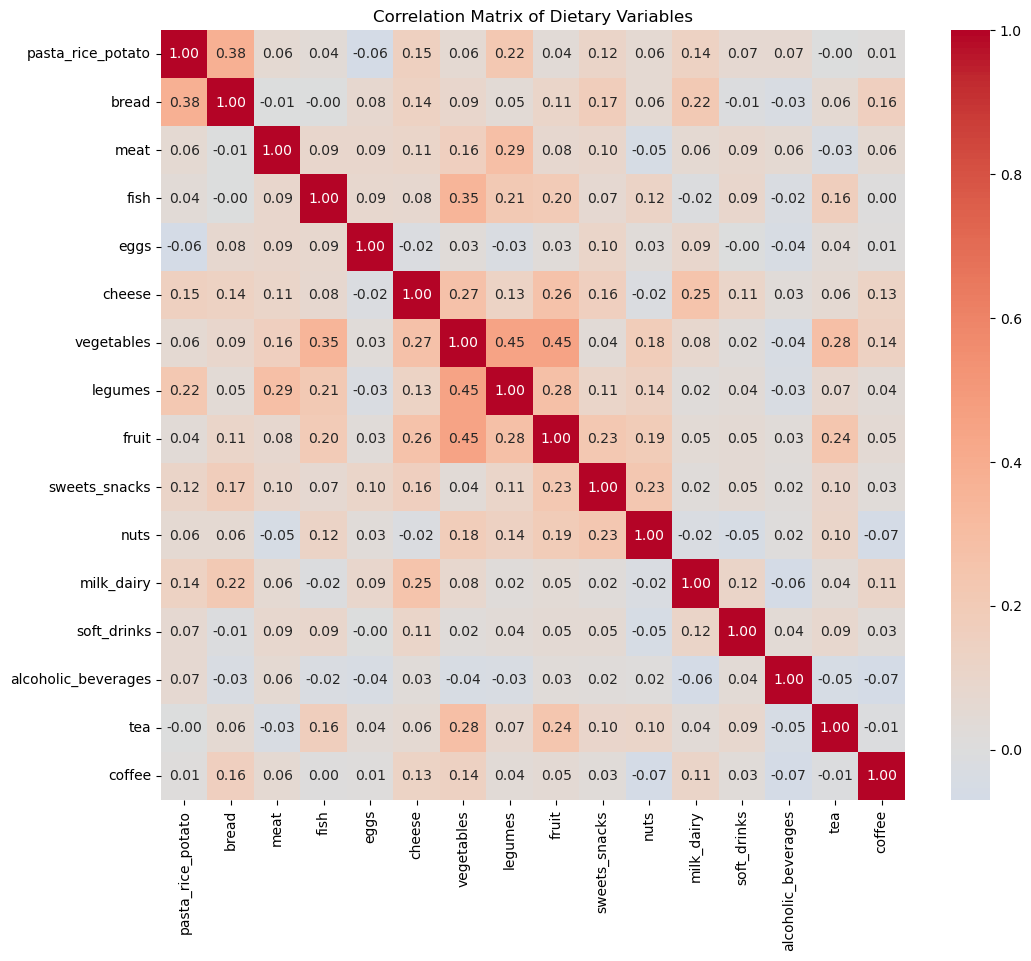

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = aggregated_data[diet_vars].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Dietary Variables")
plt.show()

## Discovering dietary patterns with Gaussian Mixture Models (GMM)

## Use BIC and AIC 

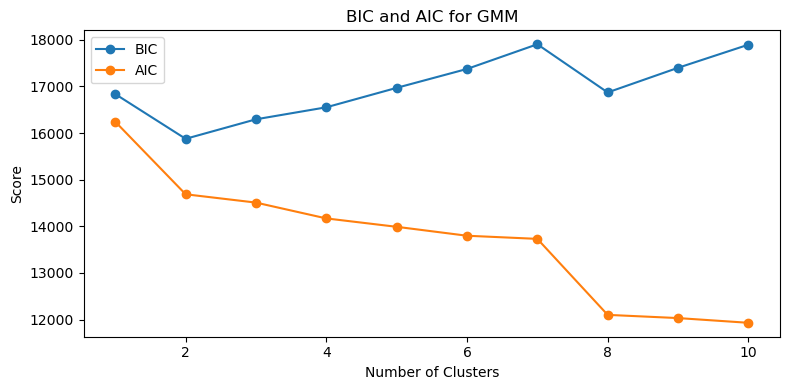

In [33]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n_components = np.arange(1, 11)  # Try 1 to 10 clusters
bics = []
aics = []

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_diet)  # Assuming your input data is scaled
    bics.append(gmm.bic(X_diet))
    aics.append(gmm.aic(X_diet))

# Plot BIC and AIC
plt.figure(figsize=(8, 4))
plt.plot(n_components, bics, label='BIC', marker='o')
plt.plot(n_components, aics, label='AIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('BIC and AIC for GMM')
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
from sklearn.mixture import GaussianMixture

# Try different numbers of clusters (latent classes)
n_components = 3  # You can try 2, 3, 4, etc. and compare AIC/BIC

gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X_diet)

# Get cluster probabilities for each subject
pattern_probs = gmm.predict_proba(X_diet)

# Assign most likely pattern to each subject
pattern_labels = gmm.predict(X_diet)

aggregated_data['diet_pattern'] = pattern_labels


## Explore and visualize the discovered patterns

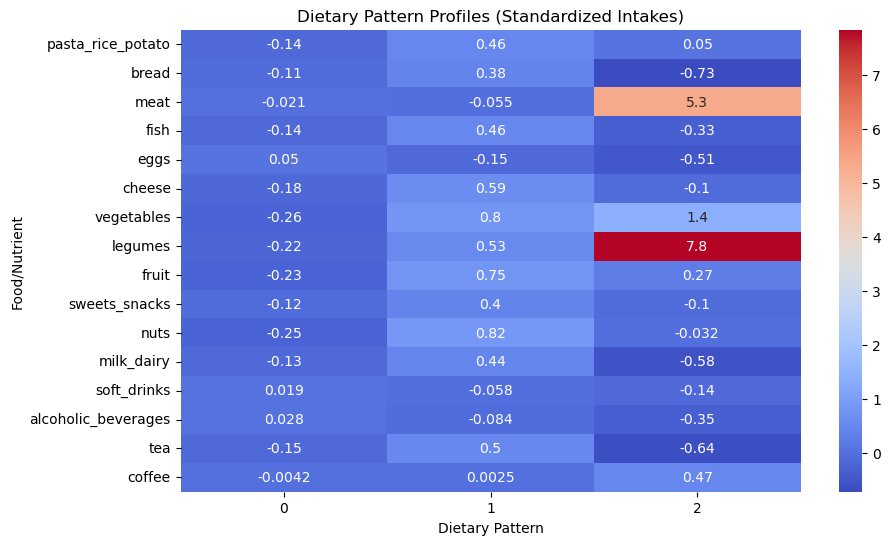

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

pattern_means = pd.DataFrame(gmm.means_, columns=diet_vars)

plt.figure(figsize=(10, 6))
sns.heatmap(pattern_means.T, annot=True, cmap='coolwarm')
plt.title('Dietary Pattern Profiles (Standardized Intakes)')
plt.xlabel('Dietary Pattern')
plt.ylabel('Food/Nutrient')
plt.show()
